<a href="https://colab.research.google.com/github/vantung20146105/BT_tuan4/blob/main/Homework_Al_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 26.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=d71645cab717824b0e857a4810e06b400c65009392475dce35e02cb78e828d96
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz

x = np.arange(8)
mfx = fuzz.trimf(x,[0,9,10])
mfx.view()

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778])

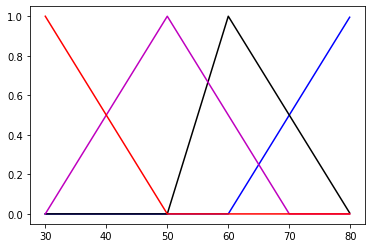

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,80,0.1)
slow=fuzz.trimf(x,[30,30,50])
medium=fuzz.trimf(x,[30,50,70])
medium_first=fuzz.trimf(x,[50,60,80])
full_speed=fuzz.trimf(x,[60,80,80])
plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='full_speed')
plt.plot(x,medium_first,'k',linewidth=1.5,label='medium first')
plt.plot(x,medium,'m',linewidth=1.5,label='medium powered')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')


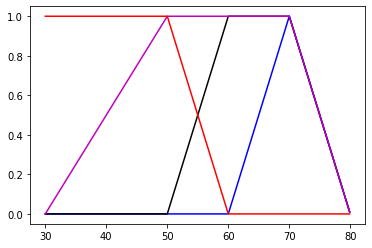

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,80,0.1)
slow = fuzz.trapmf(x,[30,30,50,60])
medium = fuzz.trapmf(x,[30,50,70,80])
medium_fast = fuzz.trapmf(x,[50,60,70,80])
full_speed = fuzz.trapmf(x,[60,70,70,80])

plt.figure()
plt.plot(x,full_speed,'b',linewidth = 1.5, label ='Full Speed')
plt.plot(x,medium_fast,'k',linewidth = 1.5, label ='Medium Fast')
plt.plot(x,medium,'m',linewidth = 1.5, label ='Medium Powerd')
plt.plot(x,slow,'r',linewidth = 1.5, label ='Slow')

# Hàm hình thang

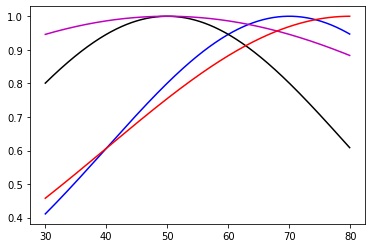

In [ ]:
x = np.arange(30,80,0.1)
slow = fuzz.gaussmf(x,80,40)
medium = fuzz.gaussmf(x,50,60)
medium_fast = fuzz.gaussmf(x,50,30)
full_speed = fuzz.gaussmf(x,70,30)

plt.figure()
plt.plot(x,full_speed,'b',linewidth = 1.5, label ='Full Speed')
plt.plot(x,medium_fast,'k',linewidth = 1.5, label ='Medium Fast')
plt.plot(x,medium,'m',linewidth = 1.5, label ='Medium Powerd')
plt.plot(x,slow,'r',linewidth = 1.5, label ='Slow')

#hàm gauss



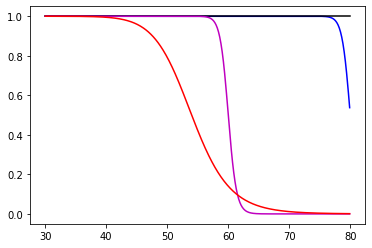

In [ ]:
x = np.arange(30,80,0.1)
slow = fuzz.gbellmf(x,50,8,4)
medium = fuzz.gbellmf(x,40,30,20)
medium_fast = fuzz.gbellmf(x,50,30,60)
full_speed = fuzz.gbellmf(x,40,30,40)

plt.figure()
plt.plot(x,full_speed,'b',linewidth = 1.5, label ='Full Speed')
plt.plot(x,medium_fast,'k',linewidth = 1.5, label ='Medium Fast')
plt.plot(x,medium,'m',linewidth = 1.5, label ='Medium Powerd')
plt.plot(x,slow,'r',linewidth = 1.5, label ='Slow')

#hàm hình chuông    gbell(x,b,c,a)


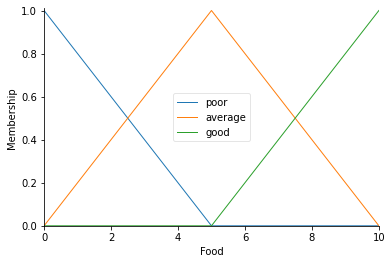

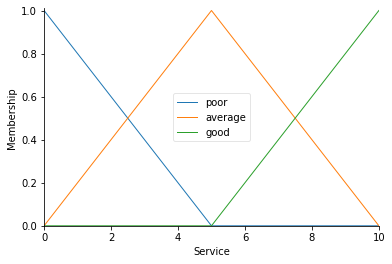

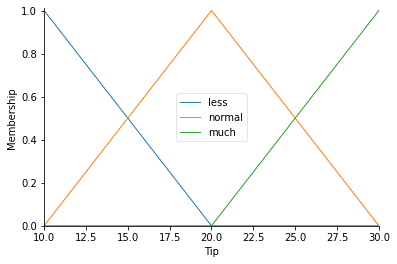

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'Food') #đầu vào
service = ctrl.Antecedent(np.arange(0,11,1),'Service')  #đầu vào
tip = ctrl.Consequent(np.arange(10,31,1),'Tip')  #đầu ra

food['poor'] = fuzz.trimf(food.universe,[0,0,5])  
food['average'] = fuzz.trimf(food.universe,[0,5,10]) 
food['good'] = fuzz.trimf(food.universe,[5,10,10]) 

service['poor'] = fuzz.trimf(service.universe,[0,0,5])  
service['average'] = fuzz.trimf(service.universe,[0,5,10]) 
service['good'] = fuzz.trimf(service.universe,[5,10,10]) 

tip['less'] = fuzz.trimf(tip.universe,[10,10,20])  
tip['normal'] = fuzz.trimf(tip.universe,[10,20,30]) 
tip['much'] = fuzz.trimf(tip.universe,[20,30,30]) 

food.view()
service.view()
tip.view()












In [ ]:
rule1=ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2=ctrl.Rule(food['poor'] & service['average'], tip['normal'])
rule3=ctrl.Rule(food['poor'] & service['good'], tip['normal'])

rule4=ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule5=ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule6=ctrl.Rule(food['average'] & service['good'], tip['much'])

rule7=ctrl.Rule(food['good'] & service['poor'], tip['normal'])
rule8=ctrl.Rule(food['good'] & service['average'], tip['much'])
rule9=ctrl.Rule(food['good'] & service['good'], tip['much'])

#rule1.view()

25.670043489383477


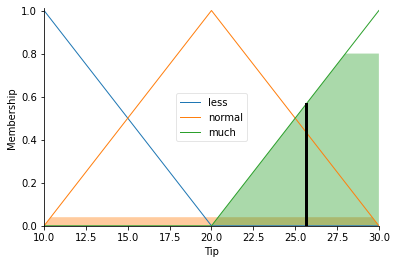

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food'] = 9
tipping.input['Service'] = 9.8
tipping.compute()
print(tipping.output['Tip'])
tip.view(sim = tipping)